# Goal

Download data from arXiv. Note arXiv has an API with a nice guide: https://info.arxiv.org/help/api/index.html

There exists a dataset for ML articles, but it contains neither author nor time fields, which makes it seem less-than-useful for our purposes: https://huggingface.co/datasets/CShorten/ML-ArXiv-Papers

We'll choose a few sub-subjects from the big list https://github.com/Mahdisadjadi/arxivscraper/blob/master/categories.md, as well as a few date ranges.


In [1]:
#pip install -U numpy

In [2]:
import arxivscraper
import pandas as pd
import time
import pickle
from unidecode import unidecode
from datetime import date, timedelta
import glob
from collections import Counter
import matplotlib.pyplot as plt
import numpy

In [1]:
#pip uninstall sentence_transformers --yes

Found existing installation: sentence-transformers 4.0.2
Uninstalling sentence-transformers-4.0.2:
  Successfully uninstalled sentence-transformers-4.0.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
#pip uninstall SentenceTransformer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

In [3]:
os.chdir('/Users/amisheth/sparseBMDS/code/EN_clust')

In [6]:
subcat = 'EC'
## aggregate the data (across months/years)
fns = '*'+subcat+'_*.pkl'
files = glob.glob(fns)
df = pd.read_pickle(files[0])
files = files[1:(len(files))]
for file in files:
    data = pd.read_pickle(file)
    df = pd.concat([df, data])
df = df.drop_duplicates(subset = ['id'])
df = df[df['created'] >= '2017-12-01']
df['authors'] = [ [unidecode(x) for x in y] for y in df['authors'] ]
name = "arXivScrape_" + subcat + ".pkl"
df.to_pickle(name)
df.shape

(3876, 8)

In [7]:
df

,id,title,categories,abstract,doi,created,updated,authors
0,1903.10965,improving the scalability of a prosumer cooper...,cs.ce cs.gt cs.lg econ.gn math.oc q-fin.ec,among the various market structures under peer...,10.1109/ptc.2019.8810558,2019-03-26,2020-07-31,"[liyang han, thomas morstyn, constance crozier..."
1,1908.09976,optimal life-cycle consumption and investment ...,q-fin.mf econ.th math.oc q-fin.pm,in this article we solve the problem of maximi...,10.1007/s11579-020-00276-9,2019-08-26,,"[andreas lichtenstern, pavel v. shevchenko, ru..."
2,2003.06987,degrees of displacement: the impact of househo...,econ.gn cs.sy eess.sy physics.soc-ph q-fin.ec,reductions in the cost of pv and batteries enc...,10.1016/j.apenergy.2020.115466,2020-03-15,,"[kelvin say, wolf-peter schill, michele john]"
3,2007.15704,job market effects of covid-19 on urban ukrain...,econ.gn q-fin.ec,the employment status of billions of people ha...,,2020-07-30,,"[tymofii brik, maksym obrizan]"
4,2007.16096,on single point forecasts for fat-tailed varia...,physics.soc-ph econ.gn q-fin.ec stat.ap stat.me,we discuss common errors and fallacies when us...,,2020-07-31,,"[nassim nicholas taleb, yaneer bar-yam, pasqua..."
...,...,...,...,...,...,...,...,...
5,2203.14904,why do banks find business process compliance ...,econ.gn q-fin.ec,banks play an intrinsic role in any modern eco...,,2022-03-24,,"[nigel adams, adriano augusto, michael davern,..."
0,2004.01624,how to build a cross-impact model from first p...,q-fin.tr cond-mat.stat-mech,trading a financial instrument pushes its pric...,,2020-04-03,2022-03-29,"[mehdi tomas, iacopo mastromatteo, michael ben..."
1,2203.15716,application of quantum computers in foreign ex...,econ.gn q-fin.cp q-fin.ec quant-ph,the main purpose of this article is to evaluat...,,2022-03-29,,[martin vesely]
0,2203.16316,some new views on product space and related di...,econ.gn q-fin.ec,we aim to contribute to the literature on prod...,,2022-03-30,,"[onder nomaler, bart verspagen]"


In [8]:
#df[['jason parker' in x for x in df['authors']]]

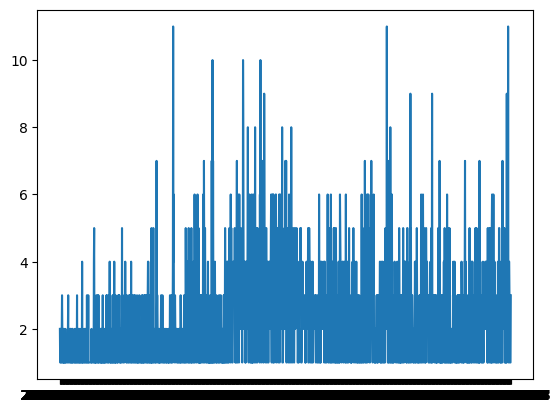

In [9]:
df['count'] = 1
plt.plot(df.groupby(by = 'created').sum(['count']));

In [10]:
Counter([len(x) for x in df['authors']]).most_common(10)

[(2, 1099),
 (1, 976),
 (3, 891),
 (4, 473),
 (5, 205),
 (6, 94),
 (7, 50),
 (8, 31),
 (10, 14),
 (9, 13)]

In [12]:
#Counter([x for y in df['authors'] for x in y]).most_common(100)

#### Combine dataset across subjects together

In [3]:
df_lo = pd.read_pickle('arXivScrape_lo.pkl')
df_phys = pd.read_pickle('arXivScrape_app-ph.pkl')
df_stat = pd.read_pickle('arXivScrape_ML.pkl')
df_qEC = pd.read_pickle('arXivScrape_EC.pkl')

In [4]:
# selecting authors with the most articles
top_lo = Counter([x for y in df_lo['authors'] for x in y]).most_common(100)
topauth_lo = []
for x in range(len(top_lo)):
    topauth_lo.append(top_lo[x][0])

In [5]:
# selecting authors with the most articles
top_phys = Counter([x for y in df_phys['authors'] for x in y]).most_common(100)
topauth_phys = []
for x in range(len(top_phys)):
    topauth_phys.append(top_phys[x][0])

In [6]:
# selecting authors with the most articles
top_stat = Counter([x for y in df_stat['authors'] for x in y]).most_common(100)
topauth_stat = []
for x in range(len(top_stat)):
    topauth_stat.append(top_stat[x][0])

In [7]:
# selecting authors with the most articles
top_qEC = Counter([x for y in df_qEC['authors'] for x in y]).most_common(100)
topauth_qEC = []
for x in range(len(top_qEC)):
    topauth_qEC.append(top_qEC[x][0])

In [71]:
#topauth_lo

In [8]:
# dataset only containing top authors
filtered_lo = df_lo[df_lo['authors'].apply(lambda author_list: bool(set(author_list) & set(topauth_lo)))]
filtered_phys = df_phys[df_phys['authors'].apply(lambda author_list: bool(set(author_list) & set(topauth_phys)))]
filtered_stat = df_stat[df_stat['authors'].apply(lambda author_list: bool(set(author_list) & set(topauth_stat)))]
filtered_qEC = df_qEC[df_qEC['authors'].apply(lambda author_list: bool(set(author_list) & set(topauth_qEC)))]

In [9]:
print(filtered_lo.shape, filtered_phys.shape, filtered_stat.shape, filtered_qEC.shape)

(1475, 8) (1838, 8) (5361, 8) (698, 8)


In [10]:
df = pd.concat([filtered_lo, filtered_phys, filtered_stat, filtered_qEC])
df = df.drop_duplicates(subset = ['id'])
df['authors'] = [ [unidecode(x) for x in y] for y in df['authors'] ]
df.shape

(9372, 8)

In [14]:
#top_lo

In [11]:
unique = Counter([x for y in df['authors'] for x in y])

In [17]:
auth_xtra = []
for name, count in unique.items():
    if count > 20:
        auth_xtra.append(name)
        #print(count)

In [18]:
len(auth_xtra)

53

In [12]:
sum(1 for count in unique.values() if count == 1)

10639

In [15]:
common_name = topauth_lo.copy()

In [18]:
common_name.extend(topauth_qEC)
#len(common_name)

In [24]:
clust_keep = (set(common_name) | set(auth_xtra))

In [26]:
#clust_keep.remove('saharon shelah')

In [20]:
#common_name.remove('saharon shelah')

In [27]:
len(clust_keep)

57

In [21]:
df_filt = df[df['authors'].apply(lambda author_list: bool(set(author_list) & set(common_name)))]
df_filt.shape

(9308, 8)

In [22]:
unique2 = Counter([x for y in df_filt['authors'] for x in y])
sum(1 for count in unique2.values() if count == 1)

10625

In [82]:
author_tot = []
for y in df_filt['authors']:
    author_row = []
    for x in y:
        if x in common_name:
            author_row.append(x)
    author_tot.append(author_row)

In [57]:
author_tot = []
for y in filtered_lo['authors']:
    author_row = []
    for x in y:
        if x in topauth_lo:
            author_row.append(x)
    author_tot.append(author_row)

In [21]:
#author_tot

In [58]:
filtered_lo.shape

(235, 8)

In [83]:
author_tot[0:10]

[['anand pillay'],
 ['anand pillay'],
 ['taishi kurahashi'],
 ['taishi kurahashi'],
 ['isaac goldbring'],
 ['assaf rinot'],
 ['sam sanders'],
 ['anand pillay'],
 ['anton freund'],
 ['ivan chajda', 'helmut langer']]

In [85]:
df_final = df_filt.copy()

In [86]:
df_final['authorsRL'] = author_tot

In [29]:
#df_final

In [87]:
unique3 = Counter([x for y in df_final['authorsRL'] for x in y])
sum(1 for count in unique3.values() if count == 1)

0

In [88]:
len(unique3.keys())

39

In [30]:
#unique3

In [89]:
df_final.to_pickle("arXivScrape_mini.pkl")
df_final.to_csv('arXivScrape_mini.csv', index = False)